In [3]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

### reset _ match :: 기업센서의 민감도를 최대한 조정하기 위함

##### 1) 시간대별 차 확인

#### 시간대 나누기 : 시간


In [4]:
def split_time(df):
    datetime_list = []
    datemonth_list = []

    for i in df["Unnamed: 0"]:
        datetime_list.append(i[11:13])
        datemonth_list.append(i[5:7])
    
    df["datetime"] = datetime_list
    df["datemonth"] = datemonth_list
    df.index = df["Unnamed: 0"]

    return df[["env_slopesolar", "env_levelsolar", "match_solar", "watt" , "datetime", "datemonth"]]

### 시간별 불러오기

In [5]:

def split_datetime(df):
    a = df[df["datetime"] == "09"]
    b = df[df["datetime"] == "10"]
    c = df[df["datetime"] == "11"]
    d = df[df["datetime"] == "12"]
    e = df[df["datetime"] == "13"]
    f = df[df["datetime"] == "14"]
    g = df[df["datetime"] == "15"]
    h = df[df["datetime"] == "16"]
    i = df[df["datetime"] == "17"]

    return a, b, c, d, e, f, g, h, i 



### 0.1~0.9 데이터 사용 (결측치 제거)

In [6]:
def diff_12(df):
    df["diff1"] = df["env_slopesolar"] - df["match_solar"]
    df["diff2"] = df["env_levelsolar"] - df["match_solar"]
    
    # print(np.quantile(df["diff1"], 0.9))

    return df[(df["diff1"] < np.quantile(df["diff1"], 0.9)) & (df["diff1"] > np.quantile(df["diff1"], 0.1))]


### 월별 평균으로 보정

In [35]:
## 9~17시 까지 월별 평균
def group_reset(df):
    df_group = df.groupby("datemonth").mean().reset_index()
    mean_list = []
    month_list = []


    for i in range(len(df_group)):
        mean_set = df_group["env_slopesolar"][i] / df_group["match_solar"][i] 
        mean_list.append(mean_set)
        month_list.append(df_group["datemonth"][i])
    
    # print(df_group)
    # print(mean_list)
    df["reset_match"] = 0.000
    for i in range(len(df)):
        for j, k in zip(mean_list, month_list):
            if df["datemonth"][i] == k:
                df["reset_match"][i] = df["match_solar"][i] * j
            else:
                pass
    
    return df




### 그래프

In [8]:

def boxplot():
    fd, axes = plt.subplots(3, 3, figsize=(12, 5))
    
    sns.boxplot(data = a[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[0][0])
    sns.boxplot(data = b[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][1])
    sns.boxplot(data = c[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[0][2])
    sns.boxplot(data = d[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][0])
    sns.boxplot(data = e[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[1][1])
    sns.boxplot(data = f[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[1][2])
    sns.boxplot(data = g[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[2][0])
    sns.boxplot(data = h[["env_slopesolar", "env_levelsolar", "match_solar"]], ax=axes[2][1])
    sns.boxplot(data = i[["env_slopesolar", "env_levelsolar", "match_solar", "reset_match"]], ax=axes[2][2])


In [9]:

def lineplot():
    fd, axes = plt.subplots(3, 3, figsize=(12, 5))
    
    sns.lineplot(data = a["diff1"], ax=axes[0][0])
    sns.lineplot(data = b["diff1"], ax=axes[0][1])
    sns.lineplot(data = c["diff1"], ax=axes[0][2])
    sns.lineplot(data = d["diff1"], ax=axes[1][0])
    sns.lineplot(data = e["diff1"], ax=axes[1][1])
    sns.lineplot(data = f["diff1"], ax=axes[1][2])
    sns.lineplot(data = g["diff1"], ax=axes[2][0])
    sns.lineplot(data = h["diff1"], ax=axes[2][1])
    sns.lineplot(data = i["diff1"], ax=axes[2][2])


In [10]:
def diff1_plotly():
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=a.index, y=a["diff1"], mode='lines', name="a", line=dict(color='aqua')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=b["diff1"], mode='lines', name="b", line=dict(color='black')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=c["diff1"], mode='lines', name="c", line=dict(color='brown')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=d["diff1"], mode='lines', name="d", line=dict(color='blue')), secondary_y = False)
    fig.add_trace(go.Scatter(x=a.index, y=e["diff1"], mode='lines', name="e", line=dict(color='coral')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=f["diff1"], mode='lines', name="f", line=dict(color='gold')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=g["diff1"], mode='lines', name="g", line=dict(color='red')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=h["diff1"], mode='lines', name="h", line=dict(color='orange')), secondary_y = False)
    fig.add_trace(go.Scatter(x=a.index, y=i["diff1"], mode='lines', name="i", line=dict(color='green')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=to_day_sum.index, y=to_day_sum["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
    fig.update_layout(width=500, height=300,)
    fig.show()
    print("경사면일사량 - 기상청일사량")
    print("09시 : ", np.round(a["diff1"].mean(), 2), " - 13시 : ", np.round(e["diff1"].mean(), 2), " - 17시 : ", np.round(i["diff1"].mean(), 2))


In [11]:
def diff2_plotly():
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=a.index, y=a["diff2"], mode='lines', name="a", line=dict(color='aqua')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=b["diff2"], mode='lines', name="b", line=dict(color='black')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=c["diff2"], mode='lines', name="c", line=dict(color='brown')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=d["diff2"], mode='lines', name="d", line=dict(color='blue')), secondary_y = False)
    fig.add_trace(go.Scatter(x=a.index, y=e["diff2"], mode='lines', name="e", line=dict(color='coral')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=f["diff2"], mode='lines', name="f", line=dict(color='gold')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=g["diff2"], mode='lines', name="g", line=dict(color='red')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=a.index, y=h["diff2"], mode='lines', name="h", line=dict(color='orange')), secondary_y = False)
    fig.add_trace(go.Scatter(x=a.index, y=i["diff2"], mode='lines', name="i", line=dict(color='green')), secondary_y = False)
    # fig.add_trace(go.Scatter(x=to_day_sum.index, y=to_day_sum["match_solar"], mode='lines', name="기상청", line=dict(color='red')), secondary_y = True)
    fig.update_layout(width=500, height=300,)
    fig.show()
    print("수평면일사량 - 기상청일사량")
    print("09시 : ", np.round(a["diff2"].mean(), 2), " - 13시 : ", np.round(e["diff2"].mean(), 2), " - 17시 : ", np.round(i["diff2"].mean(), 2))



# 반포일사량

In [12]:
b.index

NameError: name 'b' is not defined

In [36]:
df1 = pd.read_csv("./1차join/banpo1_join.csv")

df1 = split_time(df1)
a, b, c, d, e, f, g, h, i = split_datetime(df1)
a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)
df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("banpo1_join.csv")




   datemonth  env_slopesolar  env_levelsolar  match_solar         watt  \
0         01      130.795643      141.498279    54.528986  2274.284068   
1         02      180.746105      165.917332   104.761905  2957.819900   
2         03      155.328571      124.171429    61.111111  2662.058571   
3         04      502.678882      340.106225   417.962963  8480.555761   
4         05      485.141494      308.834893   399.691358  8542.203898   
5         06      432.001898      264.613775   340.196078  7309.028522   
6         07      311.495098      205.860860   224.019608  5445.311350   
7         08      278.352640      200.304410   199.305556  4798.773801   
8         09      327.023005      257.046063   242.630385  5728.965485   
9         10      315.352959      289.782989   214.512472  5531.219148   
10        11      239.142400      257.325264   134.166667  4043.979433   
11        12      160.641179      189.165914    67.348928  2635.922478   

         diff1       diff2  
0    76.

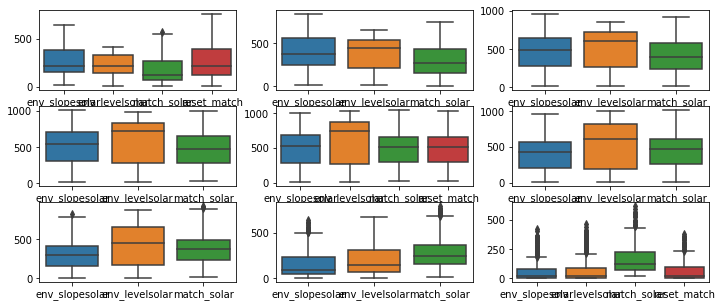

In [80]:
boxplot()

In [66]:
# lineplot()

In [68]:
diff1_plotly()

경사면일사량 - 기상청일사량
09시 :  88.97  - 13시 :  4.65  - 17시 :  -99.86


### a ~ i -> 9 ~ 17  경사일사량 - 기상청일사량 
    1) 어두울때 더 어둡게 나오는 부분(09, 17,18) 거의 음수, 
    2) 밝을때 더 밝게 나오는 경우(12~13) 거의 양수 
    3) 중간에서는 정확히 일치를 해야함(~) 0에 가깝게 
    -> 객관적 확인, 각 시간대별 나눠서 확인 차이를 확인 

    => 센서의 민감도 보다는 시간대별 조정치가 필요할지 고민(밝을때 밝다 라기 보단,, 시간의 변화에 따라 변함 즉 해의 위치에 민감)
    

In [36]:
diff2_plotly()

수평면일사량 - 기상청일사량
09시 :  49.38  - 13시 :  103.52  - 17시 :  -89.86


### a ~ i -> 9 ~ 17  수평면일사량 - 기상청일사량 
    1) 어두울때 더 어둡게 나오는 부분(09, 17,18) 거의 음수, 
    2) 밝을때 더 밝게 나오는 경우(12~13) 거의 양수 
    3) 중간에서는 정확히 일치를 해야함(~) 0에 가깝게 
    -> 객관적 확인, 각 시간대별 나눠서 확인 차이를 확인 
    
    => 어느정도 성립

    

In [37]:
# ## 9~17시 까지 월별 평균
# def group_reset(df):
#     df_group = df.groupby("datemonth").mean().reset_index()
#     mean_list = []
#     month_list = []

#     for i in range(len(df_group)):
#         mean_set = df_group["env_slopesolar"][i] / df_group["match_solar"][i] 
#         mean_list.append(mean_set)
#         month_list.append(df_group["datemonth"][i])

#     df["reset_match"] = 0.000

#     for i in range(len(df)):
#         for j, k in zip(mean_list, month_list):
#             if df["datemonth"][i] == k:
#                 df["reset_match"][i] = df["match_solar"][i] * j
#             else:
#                 pass
    
#     return df



## 반포1 데이터를 사용했지만, 다른 데이터를 사용하면 달라질 가능성 있음 

# 온곡일사량

In [38]:
# df2 = pd.read_csv("./1차join/ongok_join.csv")


In [39]:

# df2 = split_time(df2)


# a, b, c, d, e, f, g, h, i = split_datetime(df2)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)

In [40]:
# boxplot()

In [41]:
# lineplot()

In [42]:
# diff1_plotly()

In [43]:
# diff2_plotly()


### a ~ i -> 9 ~ 17  수평면일사량 - 기상청일사량 
    1) 어두울때 더 어둡게 나오는 부분(09, 17,18) 거의 음수, 
    2) 밝을때 더 밝게 나오는 경우(12~13) 거의 양수 
    3) 중간에서는 정확히 일치를 해야함(~) 0에 가깝게 
    -> 객관적 확인, 각 시간대별 나눠서 확인 차이를 확인 
    
    => 성립한다고 보기 매우 애매함, 조금더 설득력있는 것은 시간의 변화에 민감하다
    => 온곡데이터는 데이터 양이 매우 작음, 
    

# NewREC일사량

In [44]:
# df3 = pd.read_csv("./1차join/NewREC1_join.csv")

# df3 = split_time(df3)


# a, b, c, d, e, f, g, h, i = split_datetime(df3)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)

In [45]:
# boxplot()

In [46]:
# lineplot()

In [47]:
# diff1_plotly()

In [48]:
# diff2_plotly()

 
### a ~ i -> 9 ~ 17  NewREC일사량 
    1) 어두울때 더 어둡게 나오는 부분(09, 17,18) 거의 음수, 
    2) 밝을때 더 밝게 나오는 경우(12~13) 거의 양수 
    3) 중간에서는 정확히 일치를 해야함(~) 0에 가깝게 
    -> 객관적 확인, 각 시간대별 나눠서 확인 차이를 확인 
    
    => 밝을때 밝게 나온다?? x 시간의 변화에 민감함

    

# LH일사량

In [49]:
df4 = pd.read_csv("./1차join/LH1_join.csv")

df4 = split_time(df4)


a, b, c, d, e, f, g, h, i = split_datetime(df4)
a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)

In [50]:
# boxplot()


In [51]:
# lineplot()

In [52]:
# diff1_plotly()

In [53]:
# diff2_plotly()

### a ~ i -> 9 ~ 17  LH일사량 
    1) 어두울때 더 어둡게 나오는 부분(09, 17,18) 거의 음수, 
    2) 밝을때 더 밝게 나오는 경우(12~13) 거의 양수 
    3) 중간에서는 정확히 일치를 해야함(~) 0에 가깝게 
    -> 객관적 확인, 각 시간대별 나눠서 확인 차이를 확인 
    
    => 밝을때 밝게 나온다?? x 시간의 변화에 민감함


### 시간대 별 가중치? 보정값? 을 다르게 주어서 예측한다..?

In [ ]:

# #########################################################


# df1 = pd.read_csv("./1차join/bodeumchild.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("bodeumchild.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/cheongju1_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("cheongju1_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/geojeoipo_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("geojeoipo_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/geumgang1_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("geumgang1_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/hangook_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("hangook_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/LH1_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("LH1_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/miribeol_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("miribeol_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/myosan_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("myosan_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/NewREC1_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("NewREC1_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/ongok_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("ongok_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/yuka_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("yuka_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/zumun1_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("zumun1_join.csv")

# #########################################################


# df1 = pd.read_csv("./1차join/zumun8ho1_join.csv")

# df1 = split_time(df1)


# a, b, c, d, e, f, g, h, i = split_datetime(df1)
# a, b, c, d, e, f, g, h, i = diff_12(a), diff_12(b), diff_12(c), diff_12(d), diff_12(e), diff_12(f), diff_12(g), diff_12(h), diff_12(i)
# a, b, c, d, e, f, g, h, i = group_reset(a), group_reset(b), group_reset(c), group_reset(d), group_reset(e), group_reset(f), group_reset(g), group_reset(h), group_reset(i)

# df1 = pd.concat([a, b, c, d, e, f, g, h, i])
# df1.to_csv("zumun8ho1_join.csv")


# #########################################################
